<div align="center"><span style="font-family: Arial; color:#0000FF"><b>
    <span style="font-size: x-large">Métodos Numéricos II</span>
    <br>
    <span style="font-size: large">Segundo de Grado en Matemáticas - Curso 2022/23</span>
    <br>
    <span style="font-size: medium">Facultad de Ciencias de la Universidad de Málaga</span>
    <br>
    <span style="font-size: small">Dpto. de Análisis Matemático, Estadística e Investigación Operativa, y Matemática Aplicada</span>
    <br>
    <span style="font-size: small">Profs. Manuel J. Castro y Francisco J. Palma (Área Conocimiento de Matemática Aplicada)</span>
    <br>
    <span style="font-size: medium; color:#FF0000">Práctica número 11</span>
    </b></span></div>

In [2]:
from algorithms import *

<div align="left"><span style="font-family: Arial; color:#000000; font-size: medium">
    <span style="color:#FF0000"><b>Ejercicio.</b></span> Se consideran las matrices $A = \left( \begin{array}{ccc} 1 & 2 & -2 \\ 1 & 1 & 1 \\ 2 & 2 & 1 \end{array} \right)$ y $B = \left( \begin{array}{ccc} 2 & -1 & 1 \\ 2 & 2 & 2 \\ -1 & -1 & 2 \end{array} \right)$.
    <br>
    Demostrar que para la primera matriz el método iterativo de Jacobi es convergente, pero el de Gauss-Seidel no lo es, mientras que para la segunda matriz ocurre justamente lo contrario. Escribir las matrices de ambos métodos iterativos para las dos matrices dadas.
    </span></div>

In [1]:
A=array([[1,2,-2],[1,1,1],[2,2,1]])
B=array([[2,-1,1],[2,2,2],[-1,-1,2]])
print(A)

print(triu(A,1))
print(tril(A,-1))
print(diag(diag(A)))

NameError: name 'array' is not defined

In [31]:
def jacobi_matrix(M):
    return inverse_lu(diag(diag(M)))[1]@(-triu(M,1)-tril(M,-1))
def gauss_seidel_matrix(M):
    return inverse_lu(diag(diag(M))+tril(M,-1))[1]@(-triu(M,1))

def is_jaco_convergent(M, verbose=False):
    sr = max(abs(eigvals(jacobi_matrix(M))))
    if verbose:
        print(sr)
    return sr < 1

def is_gase_convergent(M, verbose=False):
    sr = max(abs(eigvals(gauss_seidel_matrix(M))))
    if verbose:
        print(sr)
    return sr < 1


print(is_jaco_convergent(A,True))
print(is_gase_convergent(A,True))
print(is_jaco_convergent(B,True))
print(is_gase_convergent(B,True))


6.590956759425272e-06
True
2.0
False
1.1180339887498945
False
0.5
True


<div align="left"><span style="font-family: Arial; color:#000000; font-size: medium">
    <span style="color:#FF0000"><b>Ejercicio.</b></span> Se considera la matriz $A = \left( \begin{array}{cccccc} 0 & & & & & \mbox{sim} \\ 1 & 0 \\ 6 & 2 & 0 \\ 0 & 7 & 3 & 0 \\ 0 & 0 & 8 & 4 & 0 \\ 0 & 0 & 0 & 9 & 5 & 0 \end{array} \right)$
    <br>
    Calcular la matriz ortogonal $\Omega$ tal que $B=\Omega^t\,A\,\Omega$ anula el elemento de módulo mayor (y su simétrico) de $A$, de acuerdo con el método de Jacobi para aproximar los autovalores de una matriz simétrica. Comprobar que las matrices $A$ y $B$ tienen la misma norma euclídea y que la contribución a dicha norma en $A$ de los elementos que se anulan, pasa ahora a la diagonal de $B$.
    </span></div>

In [61]:
A = diag(arange(1,6),-1)+diag(arange(6,10),-2)
A = conjugada(A)+A

def numeritos(n,m):
    M = diag(arange(1,n)-1)
    for i in range(2,m+1):
        M = M + diag(arange((i-1)*(n-i-1),(i+1)*(n-i-2)),-i)#AAAAAAAAAAAA
    return M + conjugada(M)    

Omeg = eye(6)
theta = pi/4 #inversa de la cotangente de 0   /2
Omeg[5,5] = cos(theta) 
Omeg[3,3] = cos(theta)
Omeg[3,5] = sin(theta)
Omeg[5,3] = -sin(theta)

#print(Omeg)

B = conjugada(Omeg)@A@Omeg

print(B)
print(norm(A-B,2))

[[ 0.00000000e+00  1.00000000e+00  6.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00  2.00000000e+00  4.94974747e+00
   0.00000000e+00  4.94974747e+00]
 [ 6.00000000e+00  2.00000000e+00  0.00000000e+00  2.12132034e+00
   8.00000000e+00  2.12132034e+00]
 [ 0.00000000e+00  4.94974747e+00  2.12132034e+00 -9.00000000e+00
  -7.07106781e-01  3.74417717e-17]
 [ 0.00000000e+00  0.00000000e+00  8.00000000e+00 -7.07106781e-01
   0.00000000e+00  6.36396103e+00]
 [ 0.00000000e+00  4.94974747e+00  2.12132034e+00 -3.74417717e-17
   6.36396103e+00  9.00000000e+00]]
15.538462817291219


<div align="left"><span style="font-family: Arial; color:#000000; font-size: medium">
    <span style="color:#FF0000"><b>Ejercicio.</b></span> Una empresa de marketing se plantea la inversión en publicidad para el próximo año. Para ello toma en cuenta los datos de gasto en publicidad y de beneficio en ventas de los últimos 7 años, que están dados por la tabla
\[
\begin{array}{c|c|c|c|c|c|c|c|c}
x &\mbox{Gastos (m€)} & 10 & 25 & 30 & 42 & 45 & 57 & 62 \\ \hline
y &\mbox{Ventas (m€)} & 20 & 30 & 45 & 53 & 62 & 83 & 95
\end{array}
\]
    La empresa va a invertir 65 m€ en publicidad, y quiere saber cuál va a ser el beneficio previsto en ventas (mediante un ajuste por mínimos cuadrados).
    </span></div>

In [55]:
# Generamos los datos.
gastos = array([10, 25, 30, 42, 45, 57, 62])
ventas = array([20, 30, 45, 53, 62, 83, 95])

In [56]:
import matplotlib.pyplot as plt

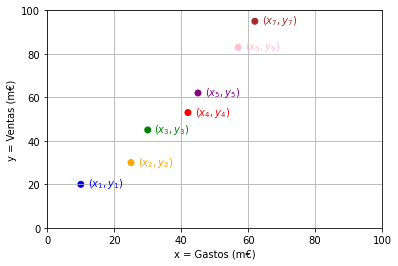

In [57]:
# Representamos los datos.
categories = array([0, 1, 2, 3, 4, 5, 6])
colormap = array(['blue', 'orange', 'green', 'red', 'purple', 'pink', 'brown'])
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.grid(True)
plt.scatter(gastos, ventas, c=colormap[categories])
plt.xlabel('x = Gastos (m€)')
plt.ylabel('y = Ventas (m€)')
for i in range(size(gastos)):
    plt.text(x=gastos[i]+2, y=ventas[i]-1, s="$(x_"+str(i+1)+",y_"+str(i+1)+")$", fontdict=dict(color=colormap[i], size=10))
plt.show()

In [ ]:
# Recta de mínimos cuadrados.

In [ ]:
# Representamos la recta.

**Ejercicio**
La evolución de la temperatura a lo largo del día sigue la siguiente función periódica 

$$T(t)=c_1+c_2cos(\pi\,t/12)+c_3sin(\pi\,t/12) \qquad t\in \big[0,24\big]$$ 
Dadas las temperaturas tomadas en ciertas horas y proporcionadas en la siguiente tabla, 

| 	| 	| 	|  	|  	| |  	| | 	| 	| 	|  	|  	| |  	| |
|-	|-	|-	|-	|-	|-	|-	|-	|-	|-	|-	|-	|-	|-	|-	|-	|
| Hora del día 	| 0h 	| 1h 	| 2h 	| 3h 	| 4h 	| 5h 	| 6h	| 7h 	| 8h 	| 9h 	| 10h 	| 11h 	| 12h	|
| Temperatura 	| 21|21|20|19|19|19|18|17|18|19|21|23|23|

determinar las constantes $c_1$,$c_2$ y $c_3$ de manera que podamos predecir la temperatura a las 20h. 